<a href="https://colab.research.google.com/github/nathankim7/colab-notebooks/blob/master/CSC321tut2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [0]:
sepal_len = iris['data'][:100, 0]
sepal_wid = iris['data'][:100, 1]
labels = iris['target'][:100]

# centering data such that biases are not required \(the bias would have centered it anyway\)
sepal_len -= np.mean(sepal_len)
sepal_wid -= np.mean(sepal_wid)

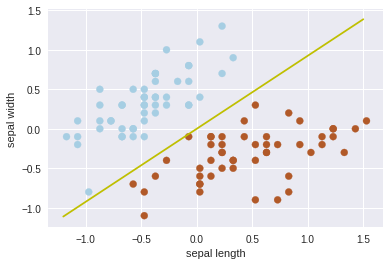

In [0]:
plt.scatter(sepal_len, sepal_wid, c=labels, cmap=plt.cm.Paired)
plt.xlabel("sepal length")
plt.ylabel("sepal width")
m = -0.371/-0.401
plt.plot([-1.2,1.5], [-1.2*m, 1.5*m], '-y')

In [0]:
def plot_weight_space(sepal_len, sepal_wid, lab = 1, color = 'steelblue', maxlim = 2.0):
  plt.title("Constraint(s) in Weight Space")
  plt.ylim([-maxlim,maxlim])
  plt.xlim([-maxlim,maxlim])
  plt.xlabel("w1")
  plt.ylabel("w2")
  
  if sepal_wid != 0:
    m = -sepal_len / sepal_wid
    t = 1 * lab if sepal_wid > 0 else -1 * lab
    plt.plot([-maxlim, maxlim], [-maxlim * m, maxlim * m], '-y', color = color)
    plt.fill_between(
    [-maxlim, maxlim], # x
    [m * -maxlim, m * maxlim], # y-min
    [t * maxlim, t * maxlim], # y-max
    alpha = 0.2,
    color = color)
    
  if sepal_wid == 0: # decision boundary is vertical
    t = 1*lab if sepal_len > 0 else -1*lab
    plt.plot([0, 0], [-maxlim, maxlim], '-y', color=color)
    plt.fill_between([0, 2.0*t], [-maxlim, -maxlim], [maxlim, maxlim], alpha=0.2, color=color)

In [0]:
def solve_grad(X, t):
  N, D = np.shape(X)
  w = np.zeros([D])
  """
  convergence: every time the algorithm makes a mistake, it shifts the weight
  vector closer to the feasible set (e.g. those vectors which classify all
  positive and negative points correctly).
  """
  
  for i in range(N):
    z = np.matmul(np.transpose(w), X[i]) 
    # = w1x1 + w2x2 + ... + wDxD + b, think of ax + by + c for lines

    if z * t[i] <= 0: # e.g. in a line, all points for which ax + by + c < 0 fall below the line and all for which ax + by + c > 0 fall above
      w += t[i] * X[i]
      
  print(str(w))
  return

In [0]:
x_input = iris['data'][:100, [0, 1]]
y_target = np.sign(iris['target'][:100] - 0.5) # classes must be 1 or -1
solve_grad(x_input, y_target)

[ 0.371 -0.401]


In [0]:
x = np.array([2, 3])
y = np.array([2, 3])
np.matmul(x, y)

13